# Edge & Contour Detection

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_bgr = cv2.imread("img/alien.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

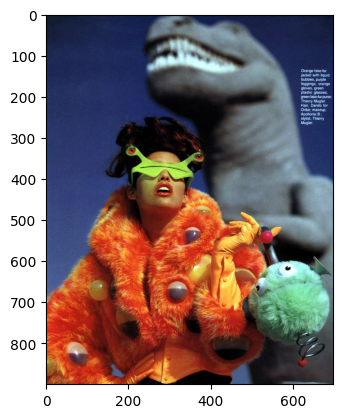

In [4]:
plt.imshow(img_rgb)

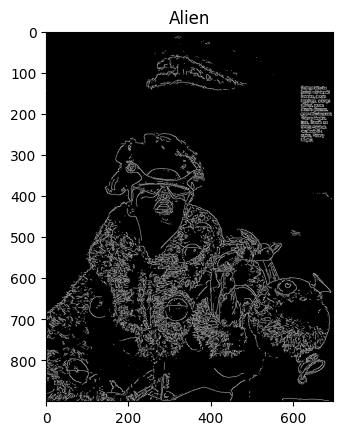

In [5]:
edges = cv2.Canny(img_rgb, 100, 100, 3, L2gradient=True)
plt.figure()
plt.title('Alien')
# plt.imsave('dancing-spider-canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

In [6]:
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(img_bgr, contours, -1, (0, 255, 0), 3)

cv2.imshow('Contours', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 628


## Video Processing (Filter Application)

In [7]:
cap = cv2.VideoCapture(0)

def apply_filter(frame, filter_choice):
    if filter_choice == 0:  # Original
        return frame
    elif filter_choice == 1:  # Grayscale
        return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    elif filter_choice == 2:  # Sepia
        sepia_filter = np.array([[0.393, 0.769, 0.189],
                                 [0.349, 0.686, 0.168],
                                 [0.272, 0.534, 0.131]])
        return cv2.transform(frame, sepia_filter)
    elif filter_choice == 3:  # Invert
        return cv2.bitwise_not(frame)
    elif filter_choice == 4:  # Blur
        return cv2.GaussianBlur(frame, (15, 15), 0)
    elif filter_choice == 5:  # Edge Detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    elif filter_choice == 6:  # Emboss
        kernel = np.array([[0, -1, -1],
                           [1, 0, -1],
                           [1, 1, 0]])
        return cv2.filter2D(frame, -1, kernel)
    elif filter_choice == 7:  # Vintage
        vintage_filter = np.array([[0.8, 0.2, 0.2],
                                    [0.2, 0.8, 0.2],
                                    [0.2, 0.2, 0.8]])
        return cv2.transform(frame, vintage_filter)
    elif filter_choice == 8:  # Pencil Sketch
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        invert_gray = cv2.bitwise_not(gray)
        blur = cv2.GaussianBlur(invert_gray, (21, 21), 0)
        blend = cv2.divide(gray, 255 - blur, scale=200)
        return cv2.cvtColor(blend, cv2.COLOR_GRAY2BGR)

# Filter names
filter_names = [
    "Original",
    "Grayscale",
    "Sepia",
    "Invert",
    "Blur",
    "Edge Detection",
    "Emboss",
    "Vintage",
    "Pencil Sketch"
]

filter_choice = 0  # Default filter choice

while True:
    ret, frame = cap.read()
    
    filtered_frame = apply_filter(frame, filter_choice)
    
    cv2.imshow("camera", filtered_frame)
    
    key = cv2.waitKey(1)
    
    if key & 0xFF == ord('x'):
        break
    elif key >= ord('0') and key <= ord('8'):
        filter_choice = key - ord('0')
        print("Selected Filter:", filter_names[filter_choice])
        
cv2.destroyAllWindows()


Selected Filter: Original
Selected Filter: Grayscale
Selected Filter: Sepia
Selected Filter: Invert
Selected Filter: Blur
Selected Filter: Edge Detection
Selected Filter: Emboss
Selected Filter: Vintage
Selected Filter: Pencil Sketch
